**Data Augmentation Comparison**

In [ ]:
from utils import fashionmnist_dataloader,train, val
from utils import ResNet18

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Import Library

In [ ]:
# baseline cnn model for fashion mnist
import numpy as np

import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import Adam



**1. Initialize Device**

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='cuda')

In [ ]:
# Define Basic Technique Dataloader
batch_size = 50
norm_train_loader, norm_val_loader ,norm_test_loader = fashionmnist_dataloader(batch_size,basic_aug=True)



100%|██████████| 26421880/26421880 [00:01<00:00, 17638012.60it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273916.42it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5034088.26it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23964791.33it/s]
/opt/conda/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 16994881.66it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270652.62it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5065031.84it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11199313.79it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Define Model

In [ ]:
num_classes = 10

In [ ]:
# For basic technique

criterion_norm = nn.CrossEntropyLoss()
model_for_norm = ResNet18(num_classes).to(device)
optimizer_norm = Adam(model_for_norm.parameters(), lr=3e-4)

model_for_norm

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 194MB/s]


ResNet18(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (downsample): Identity()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, mome

Basic Technique Part

In [ ]:
# Basic Technique
num_epochs=10
print("Basic Technique")
norm_train_losses, norm_test_losses = [], []
norm_train_accuracies, norm_test_accuracies = [], []

for epoch in range(1, num_epochs + 1):
        train_acc, train_loss = train(model_for_norm, criterion_norm, norm_train_loader, optimizer_norm, epoch, device)
        test_acc, test_loss = val(model_for_norm, criterion_norm, norm_val_loader, device)

        norm_train_accuracies.append(train_acc)
        norm_train_losses.append(train_loss)
        norm_test_accuracies.append(test_acc)
        norm_test_losses.append(test_loss)

Basic Technique
Train Epoch: 1	Average Loss: 1.091514	Accuracy: 60.90%
Val Loss: 0.9184, Val Accuracy: 67.94%
Train Epoch: 2	Average Loss: 0.839215	Accuracy: 70.08%
Val Loss: 0.9057, Val Accuracy: 68.39%
Train Epoch: 3	Average Loss: 0.747357	Accuracy: 73.36%
Val Loss: 0.8897, Val Accuracy: 69.58%
Train Epoch: 4	Average Loss: 0.686983	Accuracy: 75.40%
Val Loss: 0.9147, Val Accuracy: 68.07%
Train Epoch: 5	Average Loss: 0.646526	Accuracy: 76.74%
Val Loss: 0.7706, Val Accuracy: 73.38%
Train Epoch: 6	Average Loss: 0.616033	Accuracy: 77.73%
Val Loss: 0.9110, Val Accuracy: 70.30%
Train Epoch: 7	Average Loss: 0.586642	Accuracy: 78.87%
Val Loss: 0.6513, Val Accuracy: 76.61%
Train Epoch: 8	Average Loss: 0.562844	Accuracy: 79.68%
Val Loss: 0.6929, Val Accuracy: 76.06%
Train Epoch: 9	Average Loss: 0.540076	Accuracy: 80.32%
Val Loss: 0.6550, Val Accuracy: 76.72%
Train Epoch: 10	Average Loss: 0.514734	Accuracy: 81.13%
Val Loss: 0.6630, Val Accuracy: 76.68%


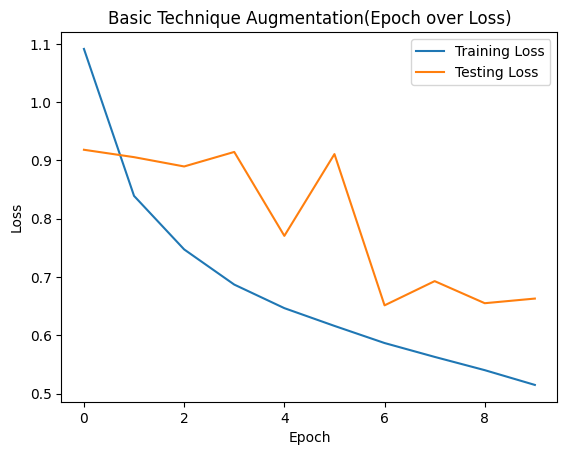

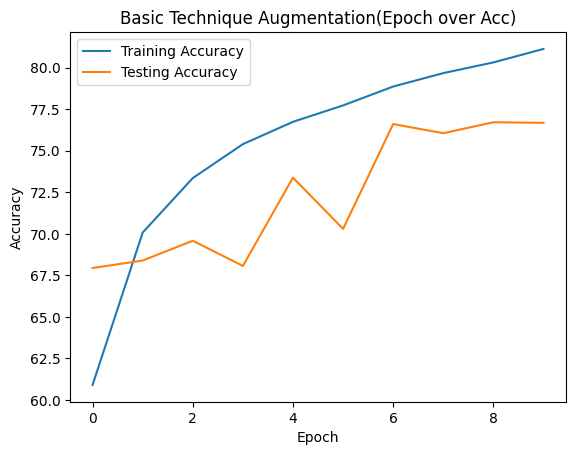

In [ ]:
plt.plot(norm_train_losses, label="Training Loss")
plt.plot(norm_test_losses, label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Basic Technique Augmentation(Epoch over Loss)")
plt.show()


plt.plot(norm_train_accuracies, label="Training Accuracy")
plt.plot(norm_test_accuracies, label="Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Basic Technique Augmentation(Epoch over Acc)")
plt.legend()
plt.show()